In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/ml/sign_language_detection/data.zip -d /content/drive/MyDrive/ml/sign_language_detection

In [ ]:
!pip install keras
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import os

## Tiền xử lý dữ liệu

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/ml/sign_language_detection/data/train',                                
                                                 target_size = (128, 128),       #resize tất cả ảnh về 128x128
                                                 batch_size = 10,
                                                 color_mode = 'grayscale',                                
                                                 class_mode = 'categorical')

Found 1924 images belonging to 4 classes.


In [ ]:
training_set.class_indices

{'Heart': 0, 'I love you': 1, 'Like': 2, 'OK': 3}

In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/ml/sign_language_detection/data/test',
                                            target_size = (128, 128),                                  
                                            batch_size = 10,        
                                            color_mode = 'grayscale',
                                            class_mode = 'categorical')

Found 480 images belonging to 4 classes.


### Tạo model CNN

In [ ]:
# Tạo model
classifier = tf.keras.models.Sequential()

# Thêm các layer

# Convolutional layer
classifier.add(tf.keras.layers.Conv2D(filters=32,
                                     kernel_size=3, 
                                     padding="same", 
                                     activation="relu", 
                                     input_shape=[128, 128, 1]))
classifier.add(tf.keras.layers.MaxPool2D(pool_size=2, 
                                         strides=2, 
                                         padding='valid'))
classifier.add(tf.keras.layers.Conv2D(filters=32, 
                                      kernel_size=3, 
                                      padding="same", 
                                      activation="relu"))

classifier.add(tf.keras.layers.MaxPool2D(pool_size=2, 
                                         strides=2, 
                                         padding='valid'))
classifier.add(tf.keras.layers.Flatten())

#### Fully-Connected

In [ ]:
classifier.add(tf.keras.layers.Dense(units=128, 
                                     activation='relu'))
classifier.add(tf.keras.layers.Dropout(0.5))
classifier.add(tf.keras.layers.Dense(units=96, activation='relu'))
classifier.add(tf.keras.layers.Dropout(0.5))
classifier.add(tf.keras.layers.Dense(units=64, activation='relu'))
classifier.add(tf.keras.layers.Dense(units=4, activation='softmax'))

### Training

In [ ]:
classifier.compile(optimizer = 'adam', 
                   loss = 'categorical_crossentropy', 
                   metrics = ['accuracy'])


In [ ]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 128, 128, 32)      320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [ ]:
model = classifier.fit(training_set,
                  epochs = 15,
                  validation_data = test_set)

Epoch 1/15
193/193 [==============================] - 9s 46ms/step - loss: 1.3490 - accuracy: 0.3134 - val_loss: 0.7733 - val_accuracy: 0.6562
Epoch 2/15
193/193 [==============================] - 9s 44ms/step - loss: 0.8187 - accuracy: 0.6159 - val_loss: 1.1680 - val_accuracy: 0.6042
Epoch 3/15
193/193 [==============================] - 9s 47ms/step - loss: 0.5902 - accuracy: 0.7432 - val_loss: 0.7889 - val_accuracy: 0.7021
Epoch 4/15
193/193 [==============================] - 8s 44ms/step - loss: 0.4892 - accuracy: 0.8035 - val_loss: 0.5237 - val_accuracy: 0.7979
Epoch 5/15
193/193 [==============================] - 9s 44ms/step - loss: 0.3905 - accuracy: 0.8540 - val_loss: 0.9995 - val_accuracy: 0.7250
Epoch 6/15
193/193 [==============================] - 8s 43ms/step - loss: 0.3396 - accuracy: 0.8758 - val_loss: 0.2871 - val_accuracy: 0.8938
Epoch 7/15
193/193 [==============================] - 8s 43ms/step - loss: 0.2966 - accuracy: 0.8976 - val_loss: 0.3645 - val_accuracy: 0.8771

## Đánh giá

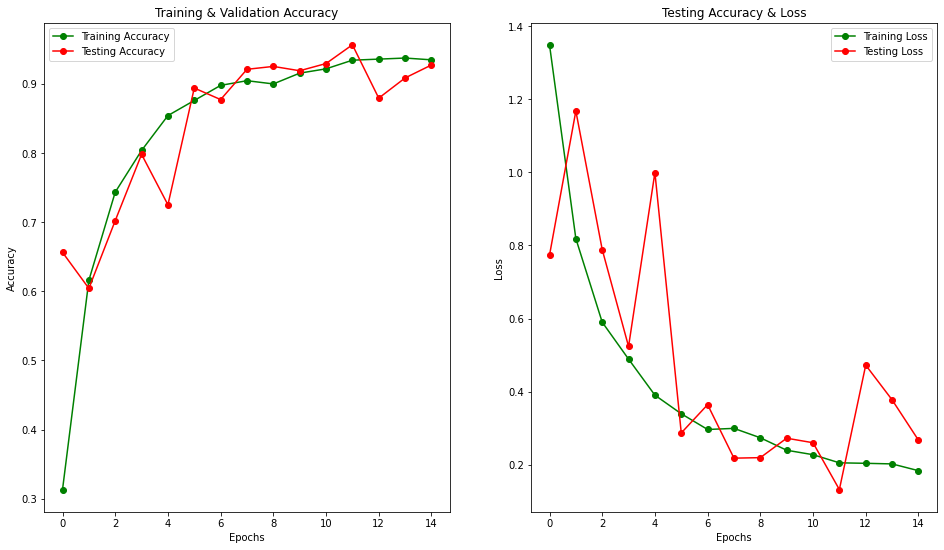

In [ ]:
import matplotlib.pyplot as plt

epochs = [i for i in range(15)]
fig , ax = plt.subplots(1,2)
train_acc = model.history['accuracy']
train_loss = model.history['loss']
val_acc = model.history['val_accuracy']
val_loss = model.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
test_accuracy = classifier.evaluate(test_set)[1]
test_accuracy

48/48 [==============================] - 1s 24ms/step - loss: 0.2675 - accuracy: 0.9271


0.9270833134651184

### Lưu model

In [ ]:
classifier.save('/content/drive/MyDrive/ml/model1.h5')